<a href="https://colab.research.google.com/github/APMAPM1/AI-ML-internship/blob/main/Cabin_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model for predicting missing value

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/Datasets/titanic.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [ ]:
df = df.dropna(subset=['Cabin'])

In [ ]:
df.shape

(204, 12)

In [ ]:
# Extract first letter of Cabin
df['Cabin_Category'] = df['Cabin'].str[0]



In [ ]:
print(df['Cabin_Category'].unique())

['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


<ipython-input-91-9c52b8051d8e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cabin_Category'], palette="coolwarm")


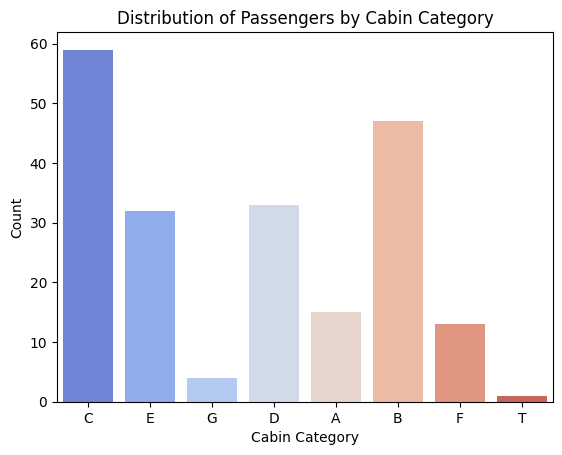

In [ ]:
sns.countplot(x=df['Cabin_Category'], palette="coolwarm")
plt.xlabel("Cabin Category")
plt.ylabel("Count")
plt.title("Distribution of Passengers by Cabin Category")
plt.show()


In [ ]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age               19
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
Cabin_Category     0
dtype: int64

In [ ]:
df.Age.mean()

35.829297297297295

In [ ]:
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Embarked'])

In [ ]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     183 non-null    int64  
 1   Survived        183 non-null    int64  
 2   Pclass          183 non-null    int64  
 3   Name            183 non-null    object 
 4   Sex             183 non-null    object 
 5   Age             183 non-null    float64
 6   SibSp           183 non-null    int64  
 7   Parch           183 non-null    int64  
 8   Ticket          183 non-null    object 
 9   Fare            183 non-null    float64
 10  Cabin           183 non-null    object 
 11  Embarked        183 non-null    object 
 12  Cabin_Category  183 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 20.0+ KB


In [ ]:
(df['Fare']==0).sum()

2

In [ ]:
df.tail(10)

PassengerId  Survived  Pclass  \
835          836         1       1   
853          854         1       1   
857          858         1       1   
862          863         1       1   
867          868         0       1   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
835                        Compton, Miss. Sara Rebecca  female  39.0      1   
853                          Lines, Miss. Mary Conover  female  16.0      0   
857                             Daly, Mr. Peter Denis     male  51.0      0   
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  female  48.0      0   
867               Roebling, Mr. Washington Augustus II    male  31.0      0   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked Cabin_Category  
835      1  PC 17756  83.1583          E49        C              E  
853      1  PC 17592  39.4000          D28        S              D  
857      0    113055  26.5500          E17        S              E  
862      0     17466  25.9292          D17        S              D  
867      0  PC 17590  50.4958          A24        S              A  
871      1     11751  52.5542          D35        S              D  
872      0       695   5.0000  B51 B53 B55        S              B  
879      1     11767  83.1583          C50        C              C  
887      0    112053  30.0000          B42        S              B  
889      0    111369  30.0000         C148        C              C

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S':2})

In [ ]:
df['Cabin_Category'] = df['Cabin_Category'].map({'A': 0, 'B': 1, 'C':2, 'D': 3, 'E': 4, 'F':5, 'G':6, 'T':7})

In [ ]:
from sklearn.preprocessing import LabelEncoder
name_encoder = LabelEncoder()
df['Name_encoded'] = name_encoder.fit_transform(df['Name'])

In [ ]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'].value_counts()

Title
Mr              81
Miss            44
Mrs             38
Master           7
Dr               3
Major            2
Mlle             2
Mme              1
Lady             1
Sir              1
Col              1
Capt             1
the Countess     1
Name: count, dtype: int64

In [ ]:
df['Title_encoded'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mlle':1, 'Mrs': 2, 'Mme':2, 'Master': 3}).fillna(4).astype(int)

In [ ]:
df['Ticket'].value_counts()

Ticket
113760      4
19950       4
PC 17582    3
35273       3
24160       3
           ..
113784      1
113043      1
28551       1
36928       1
111369      1
Name: count, Length: 127, dtype: int64

In [ ]:
# Extract the first two letters
df['Ticket_lett'] = df.Ticket.apply(lambda x: x[:2])
# Calculate ticket length
df['Ticket_len'] = df.Ticket.apply(lambda x: len(x))

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
6                             McCarthy, Mr. Timothy J    0  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                           Bonnell, Miss. Elizabeth    1  58.0      0   

    Parch    Ticket     Fare Cabin  Embarked  Cabin_Category  Family  \
1       0  PC 17599  71.2833   C85         0               2       2   
3       0    113803  53.1000  C123         2               2       2   
6       0     17463  51.8625   E46         2               4       1   
10      1   PP 9549  16.7000    G6         2               6       3   
11      0    113783  26.5500  C103         2               2       1   

    Name_encoded Title  Title_encoded Ticket_lett  Ticket_len  
1             49   Mrs              2          PC           8  
3             70   Mrs              2          11           6  
6            112    Mr              0          17           5  
10           148  Miss              1          PP           7  
11            27  Miss              1          11           6

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df['Cabin_Category']

# Define feature columns (excluding Survived)
features = [ 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family', 'Name_encoded', 'Title_encoded', 'Ticket_len']

# Create a copy to avoid modifying the original DataFrame
X = df[features].copy()

# Ensure numerical columns are of type float
num_cols = ['Age', 'Fare', 'Ticket_len']
X[num_cols] = X[num_cols].astype(float)  # Explicitly convert to float

# Scale numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])  # Now scaling works fine

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression Accuracy: 0.2432
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.29      0.25      0.27         8
           2       0.23      0.27      0.25        11
           3       0.00      0.00      0.00         3
           4       0.33      0.29      0.31         7
           5       0.50      0.50      0.50         2
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         1

    accuracy                           0.24        37
   macro avg       0.23      0.29      0.25        37
weighted avg       0.23      0.24      0.24        37

--------------------------------------------------
Decision Tree Accuracy: 0.3784
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.42      0.62      0.50         8
           2       0.54      0.64      0.58        11
           3 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.33      0.38      0.35         8
           2       0.46      0.55      0.50        11
           3       0.25      0.33      0.29         3
           4       0.40      0.29      0.33         7
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.43        37
   macro avg       0.45      0.47      0.45        37
weighted avg       0.42      0.43      0.42        37

--------------------------------------------------
SVM Accuracy: 0.3243
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.24      0.50      0.32         8
           2       0.40      0.73      0.52        11
           3       0.00      0.00      0.00         3
      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-104-a8aaee230767>:44: FutureWarnin

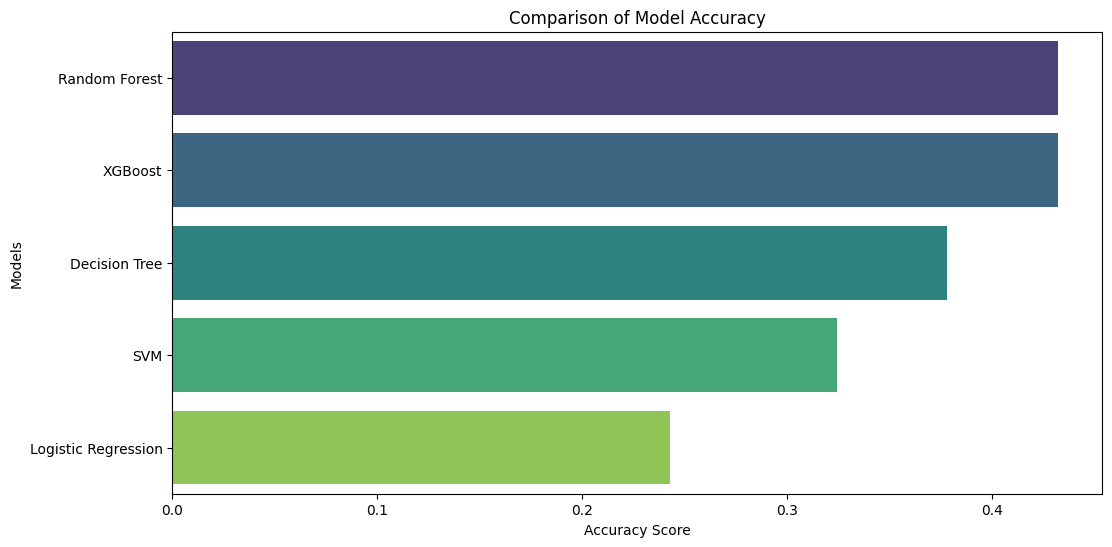


🔹 Model Accuracy Comparison:
                 Model  Accuracy
2        Random Forest  0.432432
4              XGBoost  0.432432
1        Decision Tree  0.378378
3                  SVM  0.324324
0  Logistic Regression  0.243243


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Store accuracy results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = acc  # Store accuracy
    print(f"{name} Accuracy: {acc:.4f}")  # Print accuracy
    print(classification_report(y_test, y_pred))  # Print classification report
    print("-" * 50)

# Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Sort by accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.title("Comparison of Model Accuracy")
plt.show()

accuracy_df = results_df.copy()

# Display accuracy results
print("\n🔹 Model Accuracy Comparison:")
print(accuracy_df)

Different comparision of scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# Define feature columns
features = [ 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family', 'Name_encoded', 'Title_encoded', 'Ticket_len']
num_cols = ['Age', 'Fare', 'Ticket_len']  # Numerical features to scale

# Split data
X = df[features].copy()
y = df['Cabin_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "PowerTransformer": PowerTransformer(method='yeo-johnson'),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal')
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}


In [ ]:
# Store results
results = {}

# Train models with each scaler
for scaler_name, scaler in scalers.items():
    X_scaled = X.copy()
    X_scaled[num_cols] = scaler.fit_transform(X_scaled[num_cols])  # Apply scaling
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train_scaled)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test_scaled, y_pred)

        # Store accuracy
        results[(scaler_name, model_name)] = acc

# Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Scaler_Model', 'Accuracy'])
results_df[['Scaler', 'Model']] = pd.DataFrame(results_df['Scaler_Model'].tolist(), index=results_df.index)
results_df.drop(columns=['Scaler_Model'], inplace=True)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


🔹 Model Accuracy Comparison Across Different Scaling Techniques:
Model                Decision Tree  Logistic Regression  Random Forest  \
Scaler                                                                   
MaxAbsScaler              0.378378             0.297297       0.432432   
MinMaxScaler              0.378378             0.270270       0.432432   
PowerTransformer          0.378378             0.162162       0.459459   
QuantileTransformer       0.378378             0.270270       0.432432   
RobustScaler              0.378378             0.270270       0.432432   
StandardScaler            0.378378             0.243243       0.432432   

Model                     SVM   XGBoost  
Scaler                                   
MaxAbsScaler         0.324324  0.432432  
MinMaxScaler         0.324324  0.432432  
PowerTransformer     0.324324  0.432432  
QuantileTransformer  0.324324  0.432432  
RobustScaler         0.324324  0.432432  
StandardScaler       0.324324  0.432432  


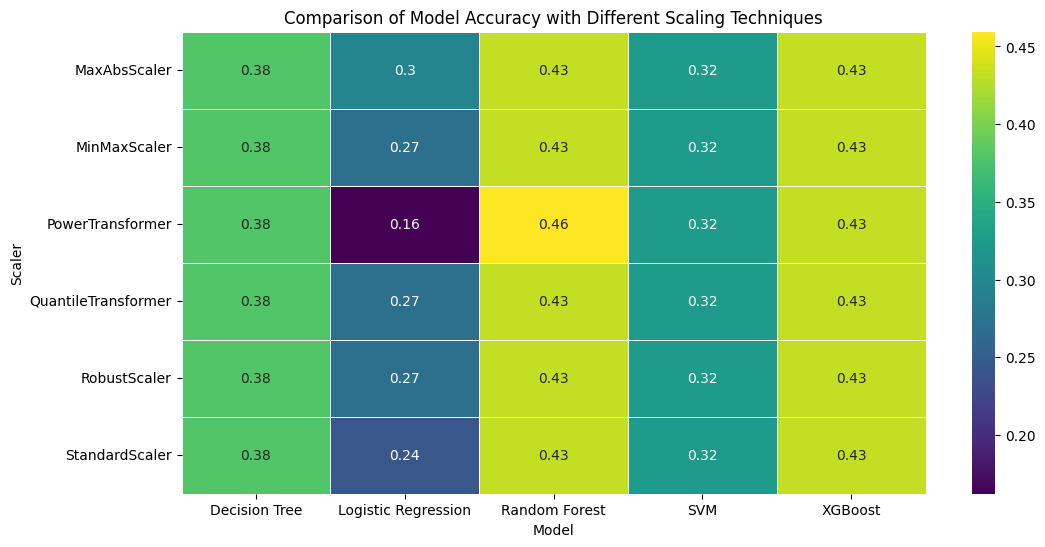

In [ ]:
# Pivot table for better visualization
results_pivot = results_df.pivot(index='Scaler', columns='Model', values='Accuracy')

# Display accuracy results
print("\n🔹 Model Accuracy Comparison Across Different Scaling Techniques:")
print(results_pivot)

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
sns.heatmap(results_pivot, annot=True, cmap='viridis', linewidths=0.5)
plt.xlabel("Model")
plt.ylabel("Scaler")
plt.title("Comparison of Model Accuracy with Different Scaling Techniques")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.2703, Loss = 1.4856
Decision Tree: Accuracy = 0.3784, Loss = 11.4225
Random Forest: Accuracy = 0.4324, Loss = 1.2653
SVM: Accuracy = 0.3243, Loss = 1.2653
XGBoost: Accuracy = 0.4324, Loss = 1.5163

🔹 Model Performance (Accuracy & Loss):
                     Accuracy       Loss
Logistic Regression  0.270270   1.485556
Decision Tree        0.378378  11.422453
Random Forest        0.432432   1.265285
SVM                  0.324324   1.265285
XGBoost              0.432432   1.516305


<ipython-input-137-4931455612af>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["Loss"], palette="coolwarm", dodge=False)


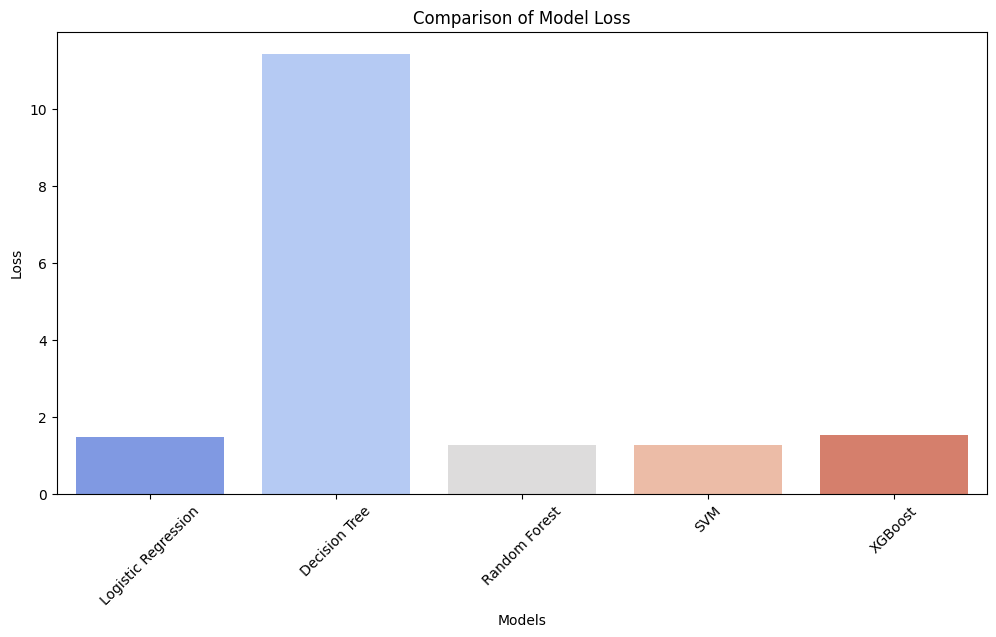

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, hinge_loss
results = {}
# Train models and calculate loss
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predictions
    acc = accuracy_score(y_test, y_pred)  # Accuracy

    # Calculate loss
    if hasattr(model, "predict_proba"):  # If model supports probability output
        y_prob = model.predict_proba(X_test)
        loss = log_loss(y_test, y_prob, labels=np.unique(y_train))
    elif isinstance(model, SVC):  # SVM uses hinge loss
        y_decision = model.decision_function(X_test)
        loss = log_loss(y_test, y_prob, labels=np.unique(y_train))
    else:
        loss = None  # Some models don't support direct loss calculation

    # Store results
    results[name] = {"Accuracy": acc, "Loss": loss}

    # Print results
    print(f"{name}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results
print("\n🔹 Model Performance (Accuracy & Loss):")
print(results_df)

# Plot loss comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["Loss"], palette="coolwarm", dodge=False)
plt.xlabel("Models")
plt.ylabel("Loss")
plt.title("Comparison of Model Loss")
plt.xticks(rotation=45)
plt.show()


🔹 **Using StandardScaler**
Logistic Regression: Accuracy = 0.2432, Loss = 1.4601
Decision Tree: Accuracy = 0.3784, Loss = 11.4225


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: Accuracy = 0.4324, Loss = 1.2664
SVM: Accuracy = 0.3243, Loss = nan
XGBoost: Accuracy = 0.4324, Loss = 1.5163

🔹 **Using MinMaxScaler**


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.2703, Loss = 1.5090
Decision Tree: Accuracy = 0.3784, Loss = 11.4225
Random Forest: Accuracy = 0.4324, Loss = 1.2672
SVM: Accuracy = 0.3243, Loss = nan
XGBoost: Accuracy = 0.4324, Loss = 1.5163

🔹 **Using RobustScaler**
Logistic Regression: Accuracy = 0.2703, Loss = 1.4496
Decision Tree: Accuracy = 0.3784, Loss = 11.4225


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: Accuracy = 0.4324, Loss = 1.2665
SVM: Accuracy = 0.3243, Loss = nan
XGBoost: Accuracy = 0.4324, Loss = 1.5163

🔹 **Using MaxAbsScaler**


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.2973, Loss = 1.5162
Decision Tree: Accuracy = 0.3784, Loss = 11.4225
Random Forest: Accuracy = 0.4324, Loss = 1.2578
SVM: Accuracy = 0.3243, Loss = nan
XGBoost: Accuracy = 0.4324, Loss = 1.5163

🔹 **Using PowerTransformer**


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.1622, Loss = 1.5089
Decision Tree: Accuracy = 0.3784, Loss = 11.4225
Random Forest: Accuracy = 0.4595, Loss = 1.2611
SVM: Accuracy = 0.3243, Loss = nan
XGBoost: Accuracy = 0.4324, Loss = 1.5163

🔹 **Using QuantileTransformer**
Logistic Regression: Accuracy = 0.2703, Loss = 1.4856
Decision Tree: Accuracy = 0.3784, Loss = 11.4225


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (183). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: Accuracy = 0.4324, Loss = 1.2653
SVM: Accuracy = 0.3243, Loss = nan
XGBoost: Accuracy = 0.4324, Loss = 1.5163

🔹 **Model Performance (Accuracy & Loss) Across Different Scaling Techniques:**
                 Scaler                Model  Accuracy       Loss
0        StandardScaler  Logistic Regression  0.243243   1.460063
1        StandardScaler        Decision Tree  0.378378  11.422453
2        StandardScaler        Random Forest  0.432432   1.266377
3        StandardScaler                  SVM  0.324324        NaN
4        StandardScaler              XGBoost  0.432432   1.516305
5          MinMaxScaler  Logistic Regression  0.270270   1.509043
6          MinMaxScaler        Decision Tree  0.378378  11.422453
7          MinMaxScaler        Random Forest  0.432432   1.267226
8          MinMaxScaler                  SVM  0.324324        NaN
9          MinMaxScaler              XGBoost  0.432432   1.516305
10         RobustScaler  Logistic Regression  0.270270   1.449614
11 

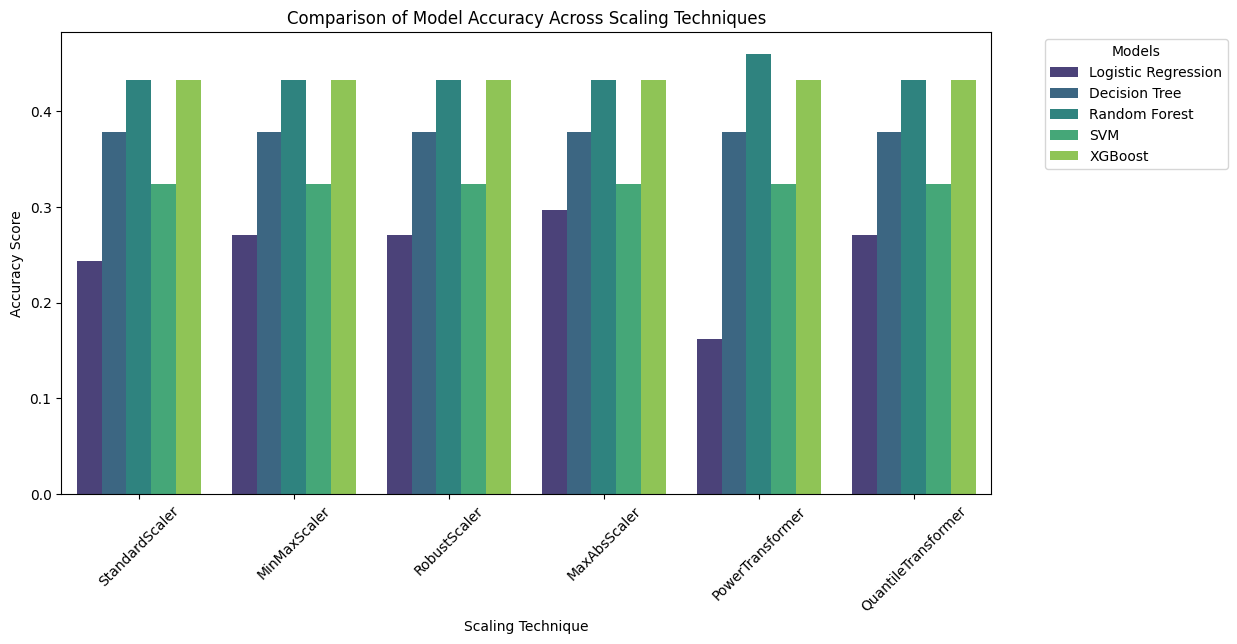

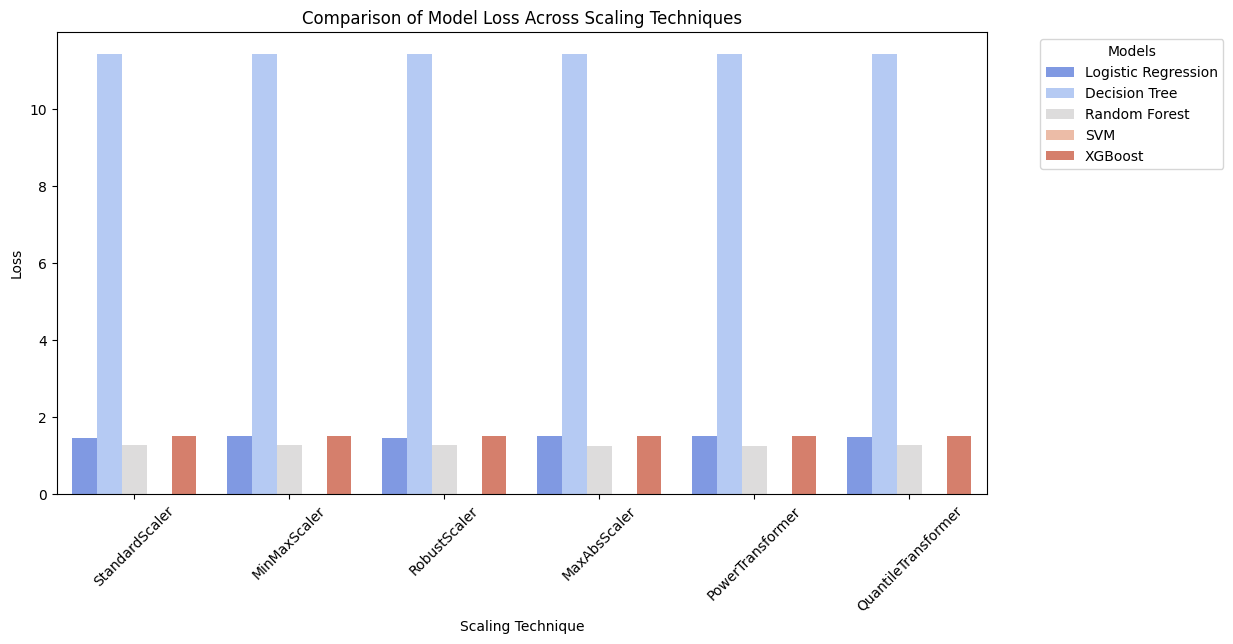

In [ ]:
# Store results
results = []

# Loop through each scaler
for scaler_name, scaler in scalers.items():
    print(f"\n🔹 **Using {scaler_name}**\n" + "=" * 50)

    # Scale numerical columns
    X_scaled = X.copy()
    num_cols = ['Age', 'Fare', 'Ticket_len']  # Numeric features
    X_scaled[num_cols] = scaler.fit_transform(X_scaled[num_cols])

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train & Evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # Compute loss
        loss = np.nan  # Default loss
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            loss = log_loss(y_test, y_prob, labels=np.unique(y_train))

        # Store results
        results.append({"Scaler": scaler_name, "Model": model_name, "Accuracy": acc, "Loss": loss})

        # Print results
        print(f"{model_name}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\n🔹 **Model Performance (Accuracy & Loss) Across Different Scaling Techniques:**")
print(results_df)

# Plot Accuracy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Scaler", y="Accuracy", hue="Model", data=results_df, palette="viridis")
plt.xlabel("Scaling Technique")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracy Across Scaling Techniques")
plt.xticks(rotation=45)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Scaler", y="Loss", hue="Model", data=results_df, palette="coolwarm")
plt.xlabel("Scaling Technique")
plt.ylabel("Loss")
plt.title("Comparison of Model Loss Across Scaling Techniques")
plt.xticks(rotation=45)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


🔹 Log Loss Comparison Across Scaling Techniques:
                Scaler  Log Loss
0       StandardScaler  1.460063
1         MinMaxScaler  1.509043
2         RobustScaler  1.449614
3         MaxAbsScaler  1.516208
4     PowerTransformer  1.508873
5  QuantileTransformer  1.485556


<ipython-input-114-79f1d97150ef>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_loss["Scaler"], y=df_loss["Log Loss"], palette="coolwarm")


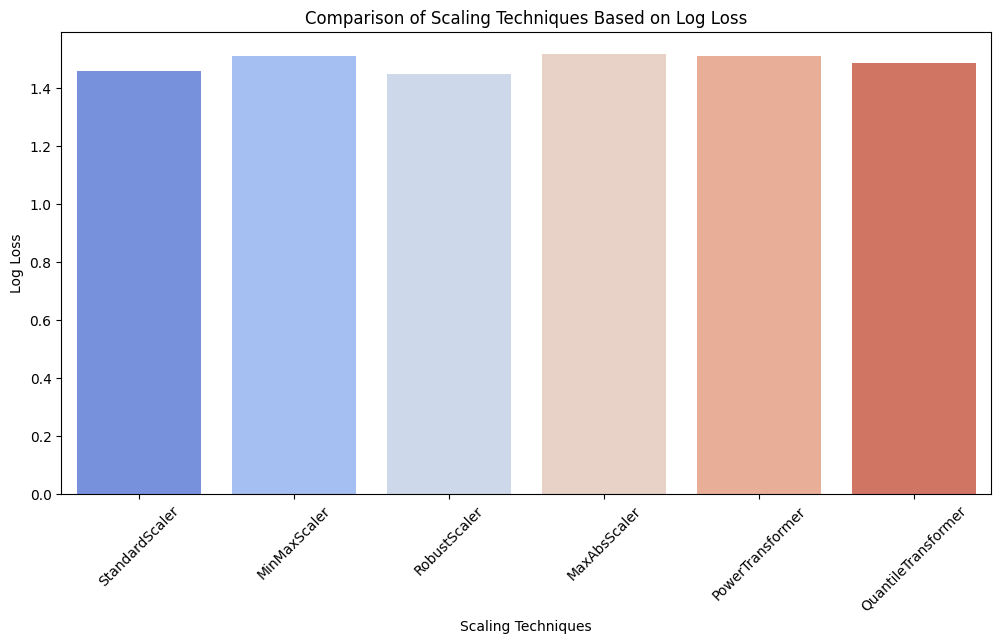

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load dataset (assuming 'df' is preloaded)
y = df['Cabin_Category']  # Target variable
features = [ 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family', 'Name_encoded', 'Title_encoded', 'Ticket_len']
X = df[features].copy()  # Copy data to avoid modifying the original DataFrame

# Ensure numerical columns are float
num_cols = ['Age', 'Fare', 'Ticket_len']
X[num_cols] = X[num_cols].astype(float)

# Define different scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "PowerTransformer": PowerTransformer(method='yeo-johnson'),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal')
}

# Initialize results storage
loss_results = []

# Train and evaluate models with different scalers
for scaler_name, scaler in scalers.items():
    # Apply scaling
    X_scaled = X.copy()
    X_scaled[num_cols] = scaler.fit_transform(X_scaled[num_cols])

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train a classification model (Logistic Regression)
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)

    # Compute log loss
    loss_scaled = log_loss(y_test, y_prob, labels=np.unique(y_train))

    # Store results
    loss_results.append({"Scaler": scaler_name, "Log Loss": loss_scaled})

# Convert results to DataFrame
df_loss = pd.DataFrame(loss_results)

# Display results
print("\n🔹 Log Loss Comparison Across Scaling Techniques:")
print(df_loss)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=df_loss["Scaler"], y=df_loss["Log Loss"], palette="coolwarm")
plt.xlabel("Scaling Techniques")
plt.ylabel("Log Loss")
plt.title("Comparison of Scaling Techniques Based on Log Loss")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load dataset (assuming 'df' is preloaded)
y = df['Cabin_Category']  # Target variable
features = [ 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family', 'Name_encoded', 'Title_encoded', 'Ticket_len']
X = df[features].copy()  # Copy data to avoid modifying the original DataFrame

# Ensure numerical columns are float
num_cols = ['Age', 'Fare', 'Ticket_len']
X[num_cols] = X[num_cols].astype(float)

# Define scaling methods to compare
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}

In [ ]:
results = []

# Define numerical columns to scale
num_cols = ['Age', 'Fare', 'Ticket_len']

for scaler_name, scaler in scalers.items():
    # Create a copy of the data to avoid modifying the original
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Scale numerical features
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

    # Train a classifier (e.g., Logistic Regression)
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict probabilities and compute log loss
    y_proba = model.predict_proba(X_test_scaled)
    loss = log_loss(y_test, y_proba, labels=np.unique(y_train))
    results.append({
        "Scaler": scaler_name,
        "Test Loss (Log Loss)": loss
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

           Scaler  Test Loss (Log Loss)
0  StandardScaler              1.517012
1    MinMaxScaler              1.515762
2    RobustScaler              1.525461
3    MaxAbsScaler              1.506174


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


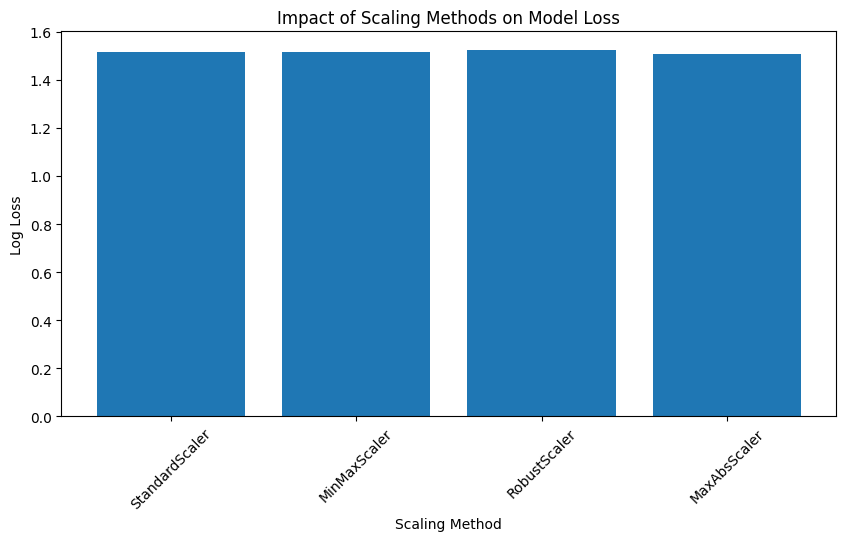

In [ ]:
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results_df['Scaler'], results_df['Test Loss (Log Loss)'])
plt.xlabel('Scaling Method')
plt.ylabel('Log Loss')
plt.title('Impact of Scaling Methods on Model Loss')
plt.xticks(rotation=45)
plt.show()

Shap

  0%|          | 0/37 [00:00<?, ?it/s]

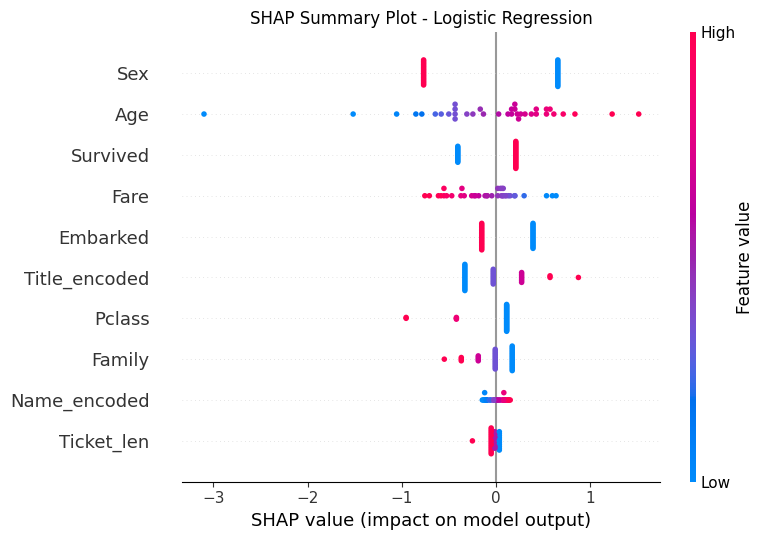

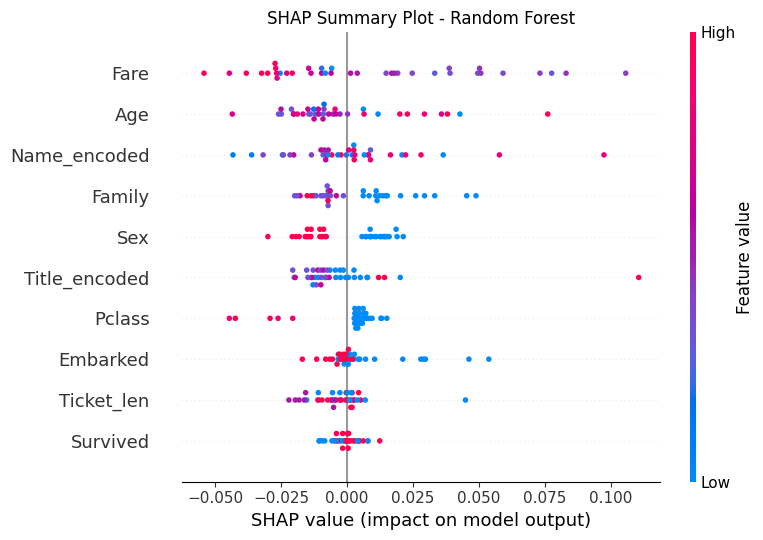

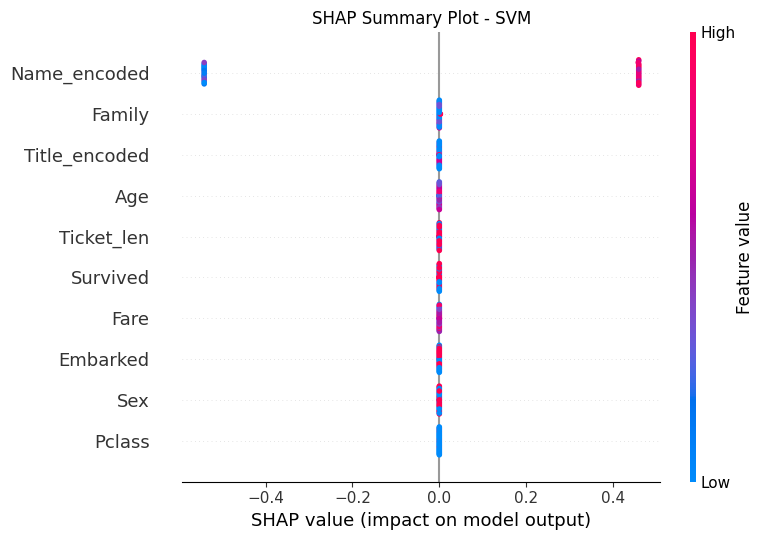

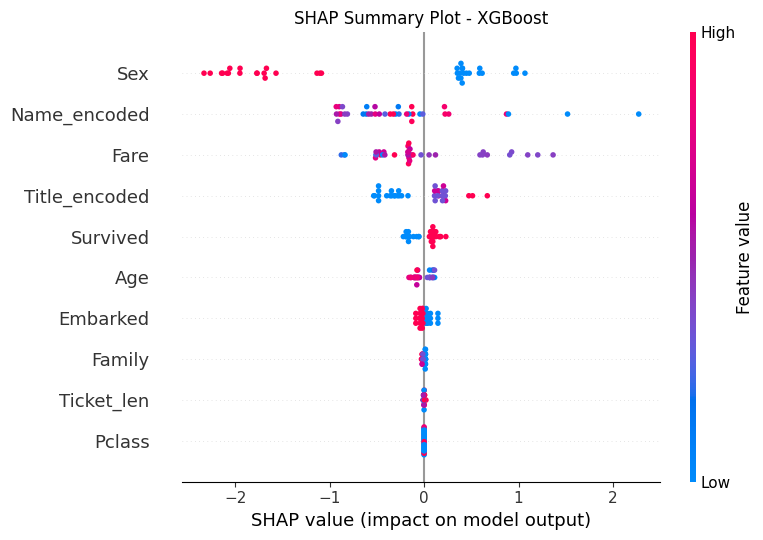

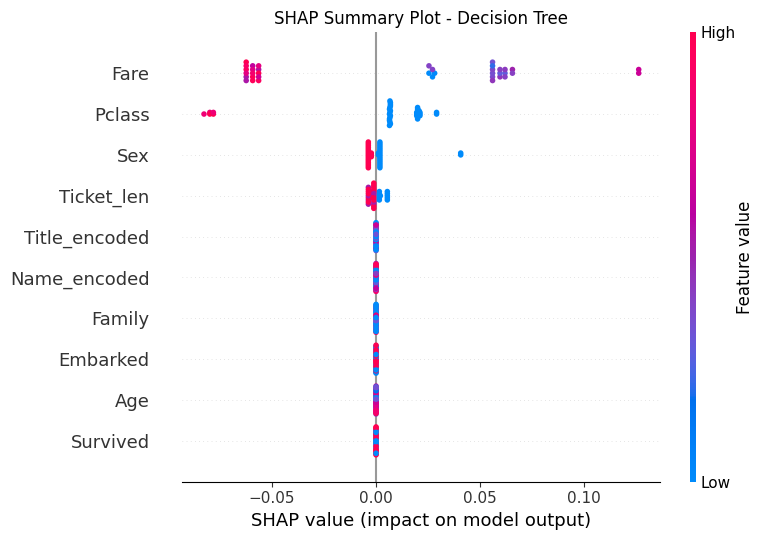

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create SHAP Explainer for each model
shap_explainers = {
    "Logistic Regression": shap.Explainer(models["Logistic Regression"], X_train),
    "Random Forest": shap.TreeExplainer(models["Random Forest"]),
    "SVM": shap.KernelExplainer(models["SVM"].predict, X_train),  # SVM requires KernelExplainer
    "XGBoost": shap.TreeExplainer(models["XGBoost"]),
    "Decision Tree": shap.TreeExplainer(models["Decision Tree"])
}

# Ensure X_test has the same feature format as X_train
X_test = X_test[X_train.columns]
# Generate SHAP values for the test set
shap_values = {name: explainer(X_test) for name, explainer in shap_explainers.items()}

# Visualize SHAP summary plot for each model
for name, shap_value in shap_values.items():
    plt.title(f"SHAP Summary Plot - {name}")
    # Check if shap_value has an extra dimension for multi-class
    if len(shap_value.shape) == 3:
        # If multi-class, take the SHAP values for the first class (index 0)
        shap.summary_plot(shap_value[:,:,0], X_test, feature_names=X_test.columns)
    else:
        shap.summary_plot(shap_value, X_test, feature_names=X_test.columns)


Permutation Importance

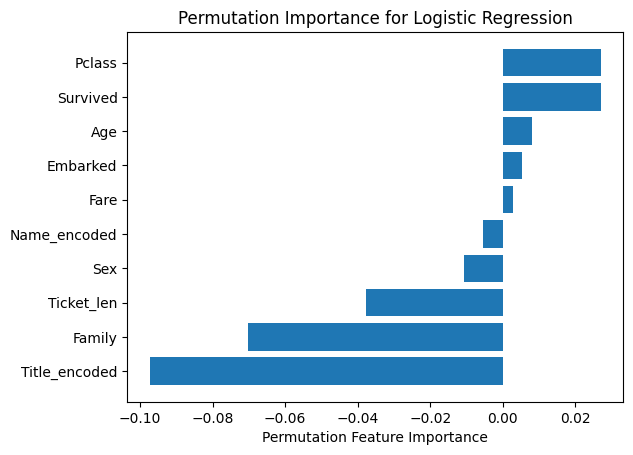

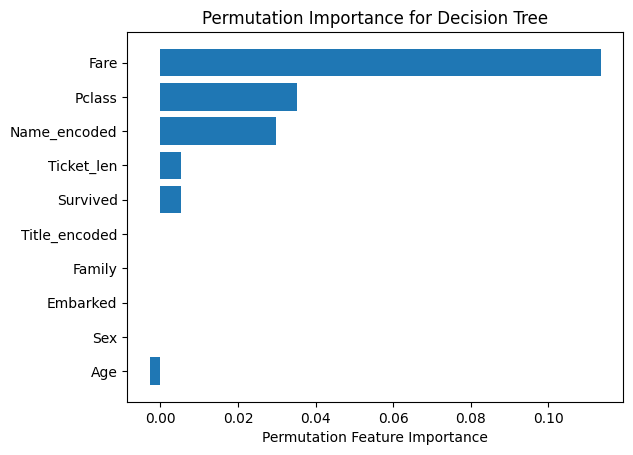

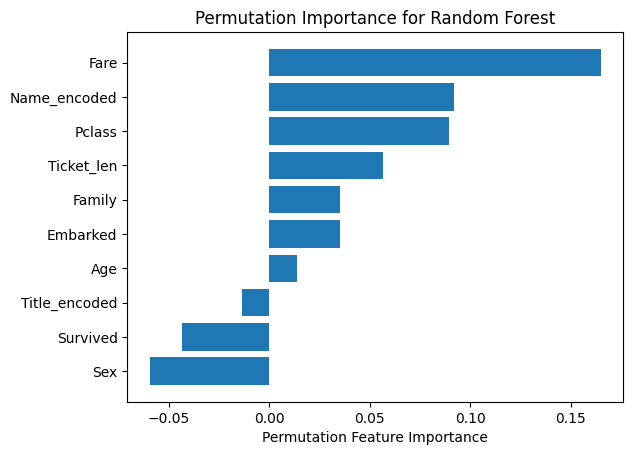

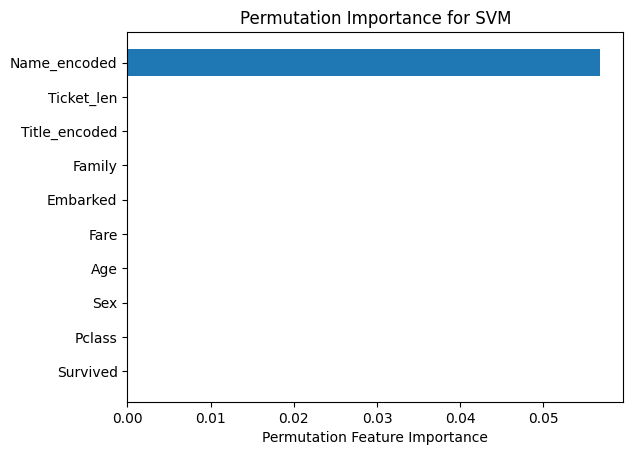

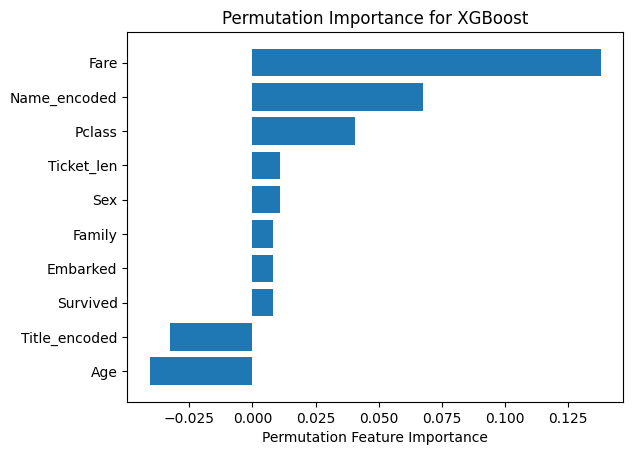

In [ ]:
from sklearn.inspection import permutation_importance

for name, model in models.items():
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()

    plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
    plt.xlabel("Permutation Feature Importance")
    plt.title(f"Permutation Importance for {name}")
    plt.show()


Feature Importance

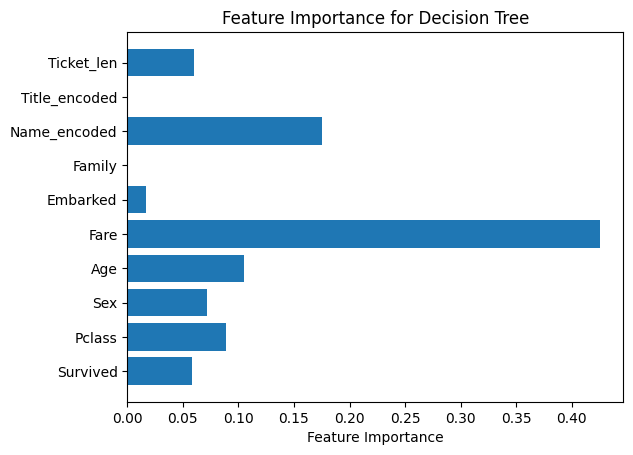

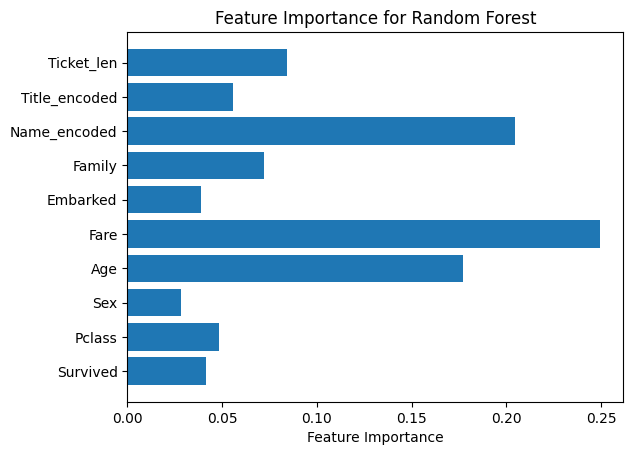

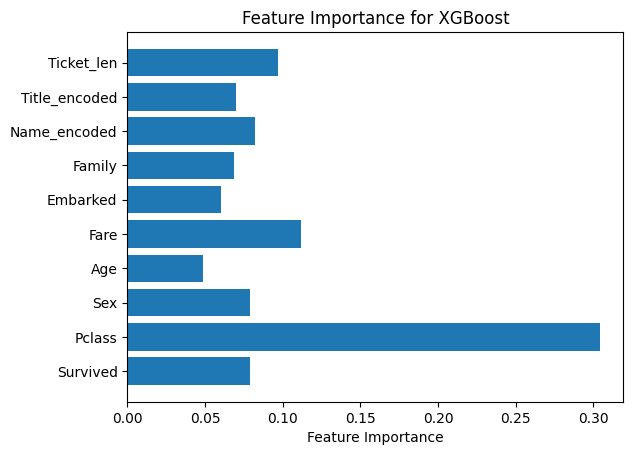

In [ ]:
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        plt.barh(X_test.columns, model.feature_importances_)
        plt.xlabel("Feature Importance")
        plt.title(f"Feature Importance for {name}")
        plt.show()


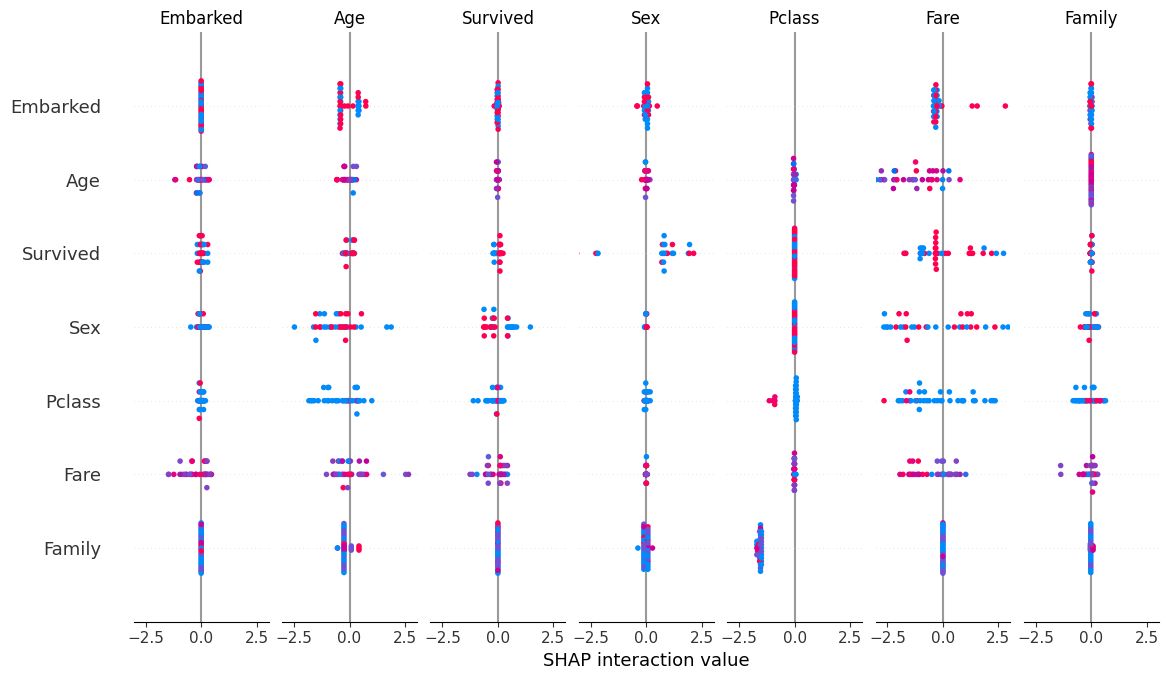

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2687113ef62e7a88fba5907e413c2d247edbbea74b31973886e5bd98163cdb35
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=model.classes_,
    verbose=True,
    mode='classification'
)

# Explain a single prediction
idx = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_test.iloc[idx], model.predict_proba, num_features=5)
exp.show_in_notebook()

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 0.08900722657186033
Prediction_local [0.44012677]
Right: 0.14678682


Counterfactual

In [ ]:
import numpy as np

# Function to generate counterfactuals
def generate_counterfactual(instance, model, feature_to_change, new_value):
    instance = instance.copy()
    instance[feature_to_change] = new_value
    return instance

# Example: Change 'Fare' for a passenger
idx = 0
original_instance = X_test.iloc[idx]
new_fare = 100  # Hypothetical new fare
counterfactual_instance = generate_counterfactual(original_instance, model, 'Fare', new_fare)

# Predict with counterfactual
original_pred = model.predict([original_instance])[0]
counterfactual_pred = model.predict([counterfactual_instance])[0]

print(f"Original Prediction: {original_pred}")
print(f"Counterfactual Prediction (Fare={new_fare}): {counterfactual_pred}")

Original Prediction: 2
Counterfactual Prediction (Fare=100): 2


Tree graph

<Figure size 8000x4000 with 0 Axes>

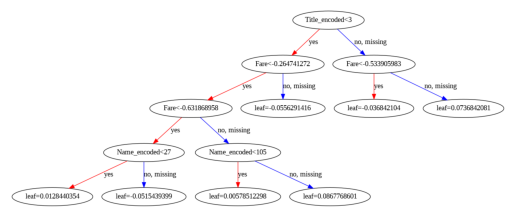

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Ensure you're using the correct model
xgb_model = models["XGBoost"]  # Replace with your trained XGBoost model variable

# Visualize a specific tree from the XGBoost model
plt.figure(figsize=(80, 40))
plot_tree(xgb_model, num_trees=0)  # Change `num_trees` to visualize different trees
plt.show()


Predicting model for missing value in visual form

In [ ]:
# Step 1: Prepare unseen input
unseen_input = {
    'Survived': 0, 'Pclass': 3, 'Sex': 1, 'Age': 30,
    'Fare': 75.0, 'Embarked': 2, 'Family': 4, 'Name_encoded': 123, 'Title_encoded': 2, 'Ticket_len': 6
}
unseen_df = pd.DataFrame([unseen_input])

# Step 2: Predict Cabin_Category
predicted_category = model.predict(unseen_df)[0]
print(f"Predicted Cabin Category: {predicted_category}")

# Step 3: Explain with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(unseen_df)
shap.initjs()
if len(shap_values.shape) == 3:
    # If multi-class, take the SHAP values for the predicted class
    shap.force_plot(explainer.expected_value[predicted_category], shap_values[0,:,predicted_category], unseen_df.iloc[0], feature_names=unseen_df.columns)
else:
    shap.force_plot(explainer.expected_value, shap_values[0], unseen_df.iloc[0], feature_names=unseen_df.columns)
# Step 4: Explain with LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=X.columns, class_names=model.classes_, verbose=True, mode='classification'
)
exp = explainer_lime.explain_instance(unseen_df.iloc[0], model.predict_proba, num_features=5)
exp.show_in_notebook()

# Step 5: Generate Counterfactual
new_fare = 100
counterfactual_instance = generate_counterfactual(unseen_df.iloc[0], model, 'Fare', new_fare)
counterfactual_pred = model.predict([counterfactual_instance])[0]
print(f"Counterfactual Prediction (Fare={new_fare}): {counterfactual_pred}")

Predicted Cabin Category: 5


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 0.2788704601594458
Prediction_local [0.12984594]
Right: 0.15854119


Counterfactual Prediction (Fare=100): 5


In textual form

In [ ]:
# Unseen input
unseen_input = {
    'Survived': 0, 'Pclass': 3,  'Sex': 1, 'Age': 17, 'Fare': 14.4583,
    'Embarked': 0, 'Family': 1, 'Name_encoded': 46, 'Title_encoded': 1, 'Ticket_len': 4
}
unseen_df = pd.DataFrame([unseen_input])

unseen_df = unseen_df[X_train.columns]

# Apply the same scaling as in training
unseen_df[num_cols] = scalers["StandardScaler"].transform(unseen_df[num_cols])  # Use the chosen scaler

# Predict Cabin_Category
predicted_category = model.predict(unseen_df)[0]
print(f"Predicted Cabin Category: {predicted_category}")

import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(unseen_df)

# Get SHAP values for the prediction
shap_values_for_instance = shap_values[0][0]  # SHAP values for the first instance

# Create a dictionary of feature contributions
feature_contributions = dict(zip(X.columns, shap_values_for_instance))

# Sort features by absolute contribution
sorted_features = sorted(feature_contributions.items(), key=lambda x: abs(x[1]), reverse=True)

# Generate textual explanation
explanation = f"The model predicted Cabin Category '{predicted_category}' because:\n"
for feature, contribution in sorted_features:
    if contribution > 0:
        explanation += f"- '{feature}' increased the likelihood of this prediction (contribution: {contribution:.2f}).\n"
    else:
        explanation += f"- '{feature}' decreased the likelihood of this prediction (contribution: {contribution:.2f}).\n"

print(explanation)

import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=model.classes_,
    verbose=True,
    mode='classification'
)

# Explain the unseen input
exp = explainer_lime.explain_instance(unseen_df.iloc[0], model.predict_proba, num_features=5)

# Generate textual explanation
explanation = f"The model predicted Cabin Category '{predicted_category}' because:\n"
for feature, weight in exp.as_list():
    explanation += f"- '{feature}' had an impact on the prediction (weight: {weight:.2f}).\n"

print(explanation)

# Function to generate counterfactuals
def generate_counterfactual(instance, model, feature_to_change, new_value):
    instance = instance.copy()
    instance[feature_to_change] = new_value
    return instance

# Example: Change 'Fare' to see its impact
new_fare = 300  # Hypothetical new fare
counterfactual_instance = generate_counterfactual(unseen_df.iloc[0], model, 'Fare', new_fare)

# Predict with counterfactual
counterfactual_pred = model.predict([counterfactual_instance])[0]

# Generate textual explanation
counterfactual_explanation = (
    f"If the 'Fare' were changed from {unseen_input['Fare']} to {new_fare}, "
    f"the predicted Cabin Category would change from '{predicted_category}' to '{counterfactual_pred}'."
)
print(counterfactual_explanation)


Predicted Cabin Category: 2
The model predicted Cabin Category '2' because:
- 'Sex' increased the likelihood of this prediction (contribution: 0.39).
- 'Pclass' decreased the likelihood of this prediction (contribution: -0.31).
- 'Fare' decreased the likelihood of this prediction (contribution: -0.10).
- 'Survived' decreased the likelihood of this prediction (contribution: -0.08).
- 'Embarked' decreased the likelihood of this prediction (contribution: -0.04).
- 'Age' increased the likelihood of this prediction (contribution: 0.00).
- 'Family' decreased the likelihood of this prediction (contribution: 0.00).



/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 0.23905182506463096
Prediction_local [0.28772029]
Right: 0.23340292
The model predicted Cabin Category '2' because:
- 'Pclass > 1.00' had an impact on the prediction (weight: -0.16).
- 'Fare > 0.65' had an impact on the prediction (weight: 0.11).
- 'Name_encoded <= 47.25' had an impact on the prediction (weight: 0.10).
- 'Survived <= 0.00' had an impact on the prediction (weight: -0.07).
- 'Family <= 1.00' had an impact on the prediction (weight: 0.06).

If the 'Fare' were changed from 14.4583 to 300, the predicted Cabin Category would change from '2' to '2'.


Missing filling model

In [ ]:
import pandas as pd
import shap
import lime
import lime.lime_tabular
import numpy as np

# Load input Excel file
input_file = "/content/drive/My Drive/Datasets/cabinmiss.xlsx"
df = pd.read_excel(input_file)

# Ensure the input file contains all necessary features
required_columns = X_train.columns  # Ensure it has the same features as training
df = df[required_columns]

# Predict Cabin_Category
df["Cabin_category"] = model.predict(df)

# Initialize SHAP and LIME explainers
explainer_shap = shap.TreeExplainer(model)
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,  # Ensure it uses the correct feature names
    class_names=model.classes_,
    verbose=True,
    mode="classification"
)

# Store explanations
shap_reasons = []
lime_reasons = []

# Generate explanations for each row
for index, row in df.iterrows():
    row_df = pd.DataFrame([row], columns=X_train.columns).fillna(0)  # Properly create row_df

    # SHAP Explanation
    shap_values = explainer_shap.shap_values(row_df)

    # Fix for multi-class models
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Select class 1 SHAP values for binary classification

    feature_contributions = dict(zip(X_train.columns, shap_values[0]))  # Fixed indexing
    sorted_features = sorted(feature_contributions.items(), key=lambda x: abs(np.sum(x[1]) if isinstance(x[1], np.ndarray) else x[1]), reverse=True)

    shap_explanation = "\n".join(
        f"- '{feature}' {'increased' if np.sum(contribution) > 0 else 'decreased'} "  # Change here
        f"the likelihood of this prediction (contribution: {np.sum(contribution):.2f})." # Applying np.sum
        for feature, contribution in sorted_features
    )
    shap_reasons.append(shap_explanation)

    # LIME Explanation
    exp = explainer_lime.explain_instance(row_df.iloc[0].values, model.predict_proba, num_features=5)  # Ensure correct format
    lime_explanation = "\n".join(f"- '{feature}' had an impact (weight: {weight:.2f})." for feature, weight in exp.as_list())
    lime_reasons.append(lime_explanation)

# Add explanations to DataFrame
df["Reason1"] = shap_reasons
df["Reason2"] = lime_reasons

# Save to a new Excel file
output_file = "/content/drive/My Drive/Datasets/output.xlsx"
df.to_excel(output_file, index=False)

print(f"✅ Predictions and explanations saved to {output_file}")


Intercept 0.34090280012291146
Prediction_local [0.0176474]
Right: 0.04677547
Intercept 0.270497422620521
Prediction_local [0.09484872]
Right: 0.04928386
Intercept 0.2951706290104302
Prediction_local [0.0866115]
Right: 0.074594125
Intercept 0.299226868171193
Prediction_local [0.08712606]
Right: 0.09079701
Intercept 0.18545818712920195
Prediction_local [0.16574165]
Right: 0.11184352
Intercept 0.3124949776817946
Prediction_local [0.08049121]
Right: 0.074594125
Intercept 0.21488987336378673
Prediction_local [0.29885491]
Right: 0.21827723
Intercept 0.2353325850403906
Prediction_local [0.26380977]
Right: 0.24784923
Intercept 0.24148471088244433
Prediction_local [0.12317092]
Right: 0.054070406
Intercept 0.06568690953917328
Prediction_local [0.32222846]
Right: 0.38726777
Intercept 0.3033090653189819
Prediction_local [0.07432212]
Right: 0.074594125
Intercept 0.3116447395848368
Prediction_local [0.07504476]
Right: 0.074594125
Intercept 0.2837957561432817
Prediction_local [0.19824318]
Right: 0.16

**Model for age filling**

In [ ]:
import pandas as pd
import shap
import lime
import lime.lime_tabular
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
6                             McCarthy, Mr. Timothy J    0  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                           Bonnell, Miss. Elizabeth    1  58.0      0   

    Parch    Ticket     Fare Cabin  Embarked  Cabin_Category  Family  \
1       0  PC 17599  71.2833   C85         0               2       2   
3       0    113803  53.1000  C123         2               2       2   
6       0     17463  51.8625   E46         2               4       1   
10      1   PP 9549  16.7000    G6         2               6       3   
11      0    113783  26.5500  C103         2               2       1   

    Name_encoded Title  Title_encoded Ticket_lett  Ticket_len  
1             49   Mrs              2          PC           8  
3             70   Mrs              2          11           6  
6            112    Mr              0          17           5  
10           148  Miss              1          PP           7  
11            27  Miss              1          11           6

Data preprocessing

In [ ]:
df = df.dropna()

df['Cabin_Category'] = df['Cabin'].astype(str).str[0]
df['Cabin_Category'] = df['Cabin_Category'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Family'] = df['SibSp'] + df['Parch'] + 1

df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

name_encoder = LabelEncoder()
df['Name_encoded'] = name_encoder.fit_transform(df['Name'])

df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title_encoded'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mlle': 1, 'Mrs': 2, 'Mme': 2, 'Master': 3}).fillna(4).astype(int)

df['Ticket_lett'] = df['Ticket'].astype(str).apply(lambda x: x[:2])  # First two letters
df['Ticket_len'] = df['Ticket'].astype(str).apply(lambda x: len(x))  # Ticket length

<ipython-input-141-040573265e76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_Category'] = df['Cabin'].astype(str).str[0]
<ipython-input-141-040573265e76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_Category'] = df['Cabin_Category'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})
<ipython-input-141-040573265e76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Train data, Random Forest

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------- Define Features and Target ----------
#selected_features = ['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family', 'Name_encoded', 'Title_encoded', 'Ticket_len', 'Cabin_Category']
selected_features = ['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family', 'Cabin_Category']

X = df[selected_features]  # Select only these columns
y = df['Age']  # Target (Age)

# ---------- Split Data ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- Standardize Features ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- Train Random Forest Model ----------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# ---------- Make Predictions ----------
y_pred = model.predict(X_test_scaled)

# ---------- Evaluate Model ----------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# Save Model & Scaler
with open("age_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model trained and saved!")

📊 Model Evaluation:
✅ Mean Absolute Error (MAE): 11.78
✅ Mean Squared Error (MSE): 194.97
✅ R² Score: 0.29
✅ Model trained and saved!


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# ---------- Train Gradient Boosting Model ----------
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

# ---------- Make Predictions ----------
y_pred = model.predict(X_test_scaled)

# ---------- Evaluate Model ----------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # R² Score as Accuracy

print(f"📊 Model Evaluation:")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ R² Score (Accuracy): {r2:.2f}")

# ---------- Save Model & Scaler ----------
with open("age_model_gb.pkl", "wb") as f:
    pickle.dump(model, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model trained, evaluated, and saved!")

📊 Model Evaluation:
✅ Mean Absolute Error (MAE): 11.91
✅ Mean Squared Error (MSE): 200.43
✅ R² Score (Accuracy): 0.27
✅ Model trained, evaluated, and saved!


In [ ]:
unseen_input = {
    'Survived': 0, 'Pclass': 1, 'Sex': 0,
    'Fare': 77.2875, 'Embarked': 2, 'Family': 2,
    #'Name_encoded': 696, 'Title_encoded': 0, 'Ticket_len': 8,
    'Cabin_Category': 3 # Example Ticket category
}
unseen_df = pd.DataFrame([unseen_input])

# Apply the same scaling
unseen_scaled = scaler.transform(unseen_df)

# ---------- Predict Age ----------
predicted_age_scaled = model.predict(unseen_scaled)[0]

# **Inverse Transform the Prediction**
predicted_age = predicted_age_scaled * scaler.scale_[-1] + scaler.mean_[-1]
print(f"Predicted Age: {predicted_age:.2f}")

# ----------------- SHAP Explanation -----------------
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(unseen_scaled)
shap.initjs()
shap.force_plot(explainer_shap.expected_value, shap_values[0], unseen_df.iloc[0], feature_names=unseen_df.columns)

# ----------------- LIME Explanation -----------------
# **Fix: Use Original (Unscaled) Training Data**
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=X.columns, verbose=True, mode='regression'
)

# **Fix: Ensure LIME Uses Correct Scaling**
def model_predict_unscaled(x):
    scaled_x = scaler.transform(x)  # Scale input
    pred_scaled = model.predict(scaled_x)  # Predict Age (scaled)
    return pred_scaled * scaler.scale_[-1] + scaler.mean_[-1]  # Convert back to real Age

# Generate Explanation
exp = explainer_lime.explain_instance(unseen_df.iloc[0].values, model_predict_unscaled, num_features=5)
exp.show_in_notebook()

Predicted Age: 63.45


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Intercept 38.890932553150186
Prediction_local [57.30404995]
Right: 63.4496311568795


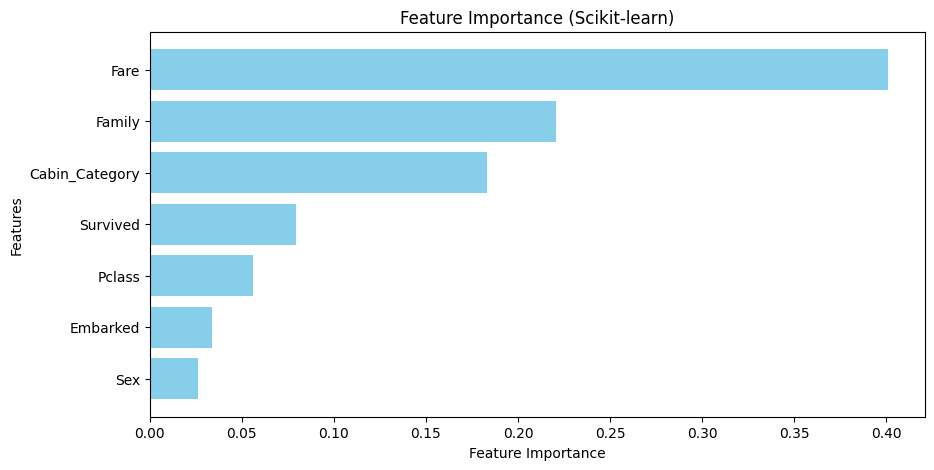

In [ ]:
feature_importance = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_idx = sorted_idx[sorted_idx < len(feature_names)]  # Keep only valid indices

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Scikit-learn)")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()